# Generating train data 

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

In [3]:
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)    

In [4]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

# Simple tf.keras Sequential Model

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy

In [7]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.6950 - accuracy: 0.4280 - val_loss: 0.6840 - val_accuracy: 0.4857 - 1s/epoch - 7ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6746 - accuracy: 0.5069 - val_loss: 0.6633 - val_accuracy: 0.5333 - 311ms/epoch - 2ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6532 - accuracy: 0.5942 - val_loss: 0.6378 - val_accuracy: 0.6429 - 302ms/epoch - 2ms/step
Epoch 4/30
189/189 - 0s - loss: 0.6287 - accuracy: 0.6497 - val_loss: 0.6087 - val_accuracy: 0.7095 - 381ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.6027 - accuracy: 0.6989 - val_loss: 0.5797 - val_accuracy: 0.7429 - 365ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5767 - accuracy: 0.7376 - val_loss: 0.5506 - val_accuracy: 0.7714 - 286ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.5505 - accuracy: 0.7783 - val_loss: 0.5210 - val_accuracy: 0.8048 - 210ms/epoch - 1ms/step
Epoch 8/30
189/189 - 0s - loss: 0.5224 - accuracy: 0.8016 - val_loss: 0.4881 - val_accuracy: 0.8190 - 225ms/epoch - 1ms/step
Epo

# Generating test data 

In [11]:
test_labels = []
test_samples = []

In [12]:
for i in range(50):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)    

In [13]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [14]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# Predict

In [15]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [16]:
rounded_predictions = np.argmax(predictions, axis=-1)

# Confusion matrix

In [17]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import itertools
import matplotlib.pyplot as plt

In [18]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

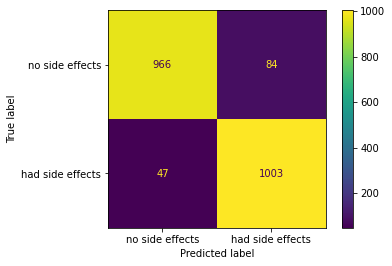

In [19]:
cm_plot_labels = ['no side effects', 'had side effects']
cmd = ConfusionMatrixDisplay(cm, display_labels=cm_plot_labels)
cmd.plot()

In [20]:
import os.path
if os.path('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

TypeError: 'module' object is not callable

In [ ]:
from tensorflow.keras.models import load_model
#new_model = load_model('models/medical_trial_model.h5')

In [ ]:
new_model.summary()

# Test with csv data (abalone)

In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

In [ ]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [ ]:
abalone_features = np.array(abalone_features)

# Test with simple glacier data

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [ ]:
glacier_data = pd.read_csv('ANN/data/glacier_data_deep_learning.csv')

In [ ]:
glacier_features = glacier_data.copy()
glacier_features = glacier_features.drop(columns=['RGIId', 'year'])
glacier_labels = glacier_features.pop('annual SMB')
# lasciare o togliere il nome?
glacier_features

In [ ]:
glacier_features = np.array(glacier_features)
glacier_labels = np.array(glacier_labels)
glacier_labels, glacier_features = shuffle(glacier_labels, glacier_features)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_glacier_features = scaler.fit_transform(glacier_features.reshape(-1,1))

In [ ]:
# load the model from bolibar 2021
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

cv_ann_model = load_model('C:\\Users\\Aaron\\Downloads\\best_model_LOYO.h5', custom_objects={"r2_keras": r2_keras, "root_mean_squared_error": root_mean_squared_error})
cv_ann_model.summary()

In [ ]:
cv_ann_model.compile(optimizer=RMSprop(learning_rate=0.0002), loss=root_mean_squared_error, metrics=root_mean_squared_error)

In [ ]:
cv_ann_model.fit(x=glacier_features, y=glacier_labels, validation_split=0.1, batch_size=10, epochs=300, shuffle=True, verbose=2)

In [ ]:
glacier_data

# Building simple model to predict smb

ATTENZIONE MinMaxScaler rima di usare deep learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
N = 10 # change

model = Sequential([
    Dense(units=40, input_shape=(N,), activation='relu'),
    Dense(units=34, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [ ]:
# 2 diff learning rate: 0.0005 in space and 0.02 in time
# what to use for metrics?
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='mse', metrics=['accuracy'])

In [ ]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

# Load model from ALPGM

In [ ]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

cv_ann_model = load_model('C:\\Users\\Aaron\\Downloads\\best_model_LOYO.h5', custom_objects={"r2_keras": r2_keras, "root_mean_squared_error": root_mean_squared_error})
cv_ann_model.summary()